# Prediksi dan Clustering Polusi Udara di Jakarta

## Dataset

| Kolom | Deskripsi |
|--------|-------------|
| `tanggal` | Tanggal pengambilan kualitas udara (YYYY-MM-DD) |
| `stasiun` | Stasiun pemantauan kualitas udara |
| `pm10` | Konsentrasi partikel udara yang berdiameter kurang dari 10 mikrometer (µg/m³) |
| `so2` | Konsentrasi sulfur dioksida di udara (µg/m³) |
| `co` | Konsentrasi karbon monoksida di udara (µg/m³) |
| `o3` | Konsentrasi ozon di permukaan tanah (µg/m³) |
| `no2` | Konsentrasi nitrogen dioksida di udara (µg/m³) | 
| `max` | Nilai maksimum dari konsentrasi polutan |
| `critical` | Polutan yang mencapai nilai maksimum |
| `categori` | Kategori kualitas udara berdasarkan konsentrasi polutan yang ada |

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('./indeks-standar-pencemar-udara-di-spku-dataset.csv')
df.head()

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
0,2020-01-01,DKI1 (Bunderan HI),30,20,10,32,9,32.0,O3,BAIK
1,2020-01-02,DKI1 (Bunderan HI),27,22,12,29,8,29.0,O3,BAIK
2,2020-01-03,DKI1 (Bunderan HI),39,22,14,32,10,39.0,PM10,BAIK
3,2020-01-04,DKI1 (Bunderan HI),34,22,14,38,10,38.0,O3,BAIK
4,2020-01-05,DKI1 (Bunderan HI),35,22,12,31,9,35.0,PM10,BAIK


In [ ]:
df.shape

(1830, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   1830 non-null   object 
 1   stasiun   1830 non-null   object 
 2   pm10      1830 non-null   object 
 3   so2       1830 non-null   object 
 4   co        1830 non-null   object 
 5   o3        1830 non-null   object 
 6   no2       1830 non-null   object 
 7   max       1826 non-null   float64
 8   critical  1814 non-null   object 
 9   categori  1830 non-null   object 
dtypes: float64(1), object(9)
memory usage: 143.1+ KB


In [ ]:
pollutants = ['pm10', 'so2', 'co', 'o3', 'no2']

for pollutant in pollutants:
    df[pollutant] = df[pollutant].replace('---', np.nan).astype(float)
    df[pollutant].fillna(df[pollutant].median(), inplace=True)
    
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   1830 non-null   object 
 1   stasiun   1830 non-null   object 
 2   pm10      1830 non-null   float64
 3   so2       1830 non-null   float64
 4   co        1830 non-null   float64
 5   o3        1830 non-null   float64
 6   no2       1830 non-null   float64
 7   max       1826 non-null   float64
 8   critical  1814 non-null   object 
 9   categori  1830 non-null   object 
dtypes: float64(6), object(4)
memory usage: 143.1+ KB
None


In [ ]:
df = df.drop('TIDAK ADA DATA', axis=0, inplace=True)

KeyError: "['TIDAK ADA DATA'] not found in axis"

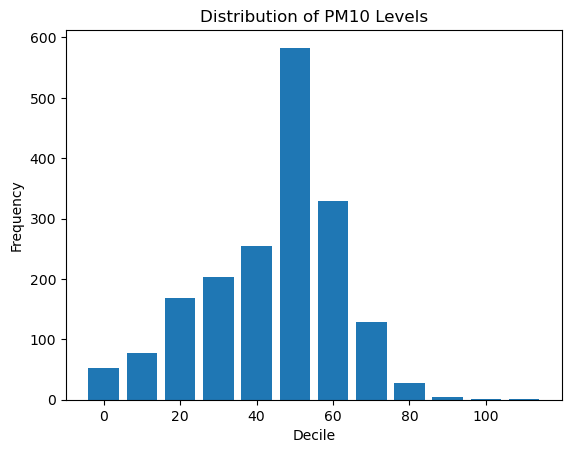

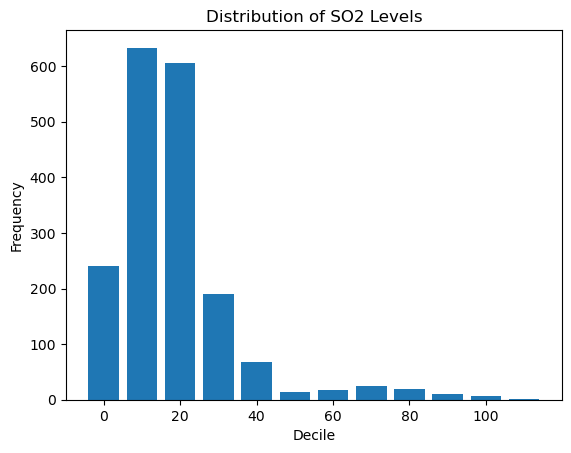

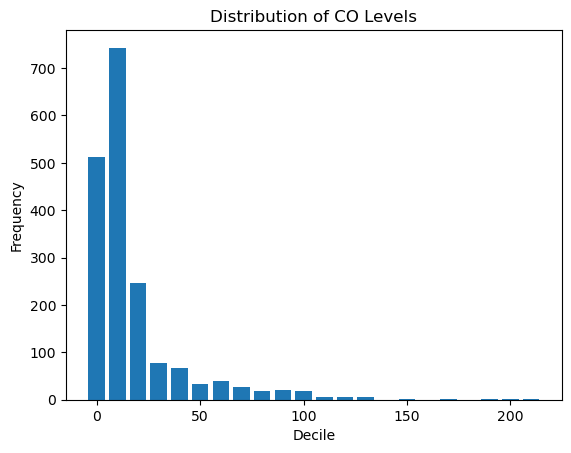

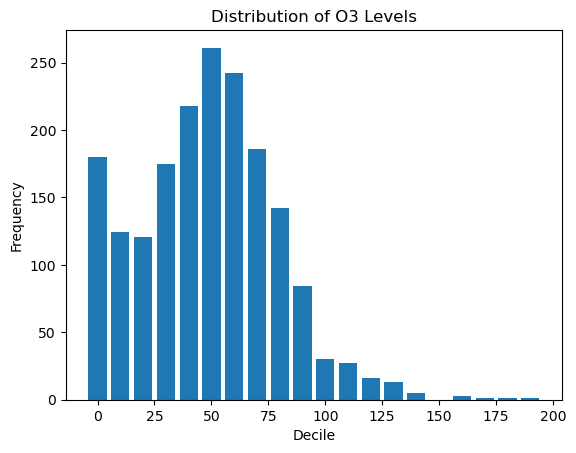

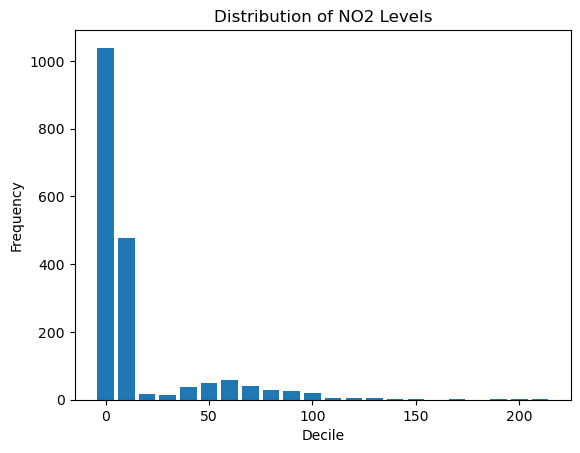

In [ ]:
from collections import Counter

for pollutant in df[pollutants]:
    decile = lambda pollutant : pollutant // 10 * 10
    histo = Counter(decile(value) for value in df[pollutant])

    plt.bar(histo.keys(), histo.values(), 8)
    plt.xlabel("Decile")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {pollutant.upper()} Levels")
    plt.show()


<Axes: xlabel='categori', ylabel='count'>

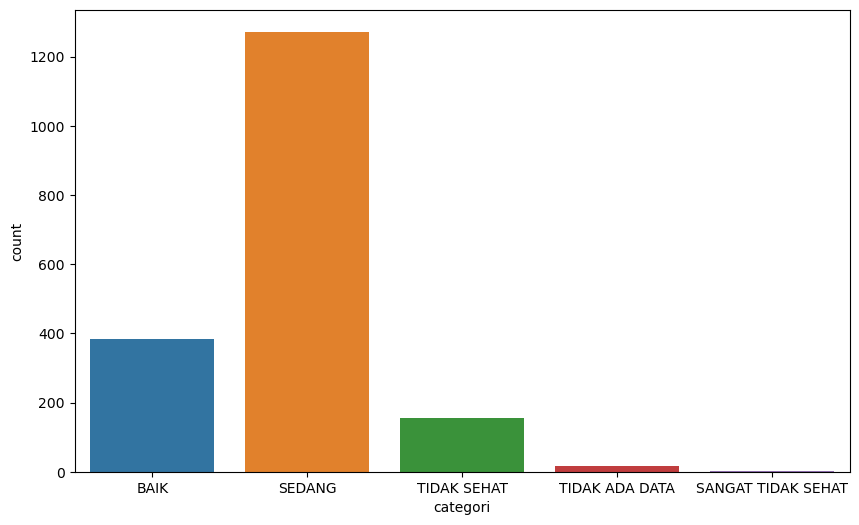

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['categori'], label='air category')

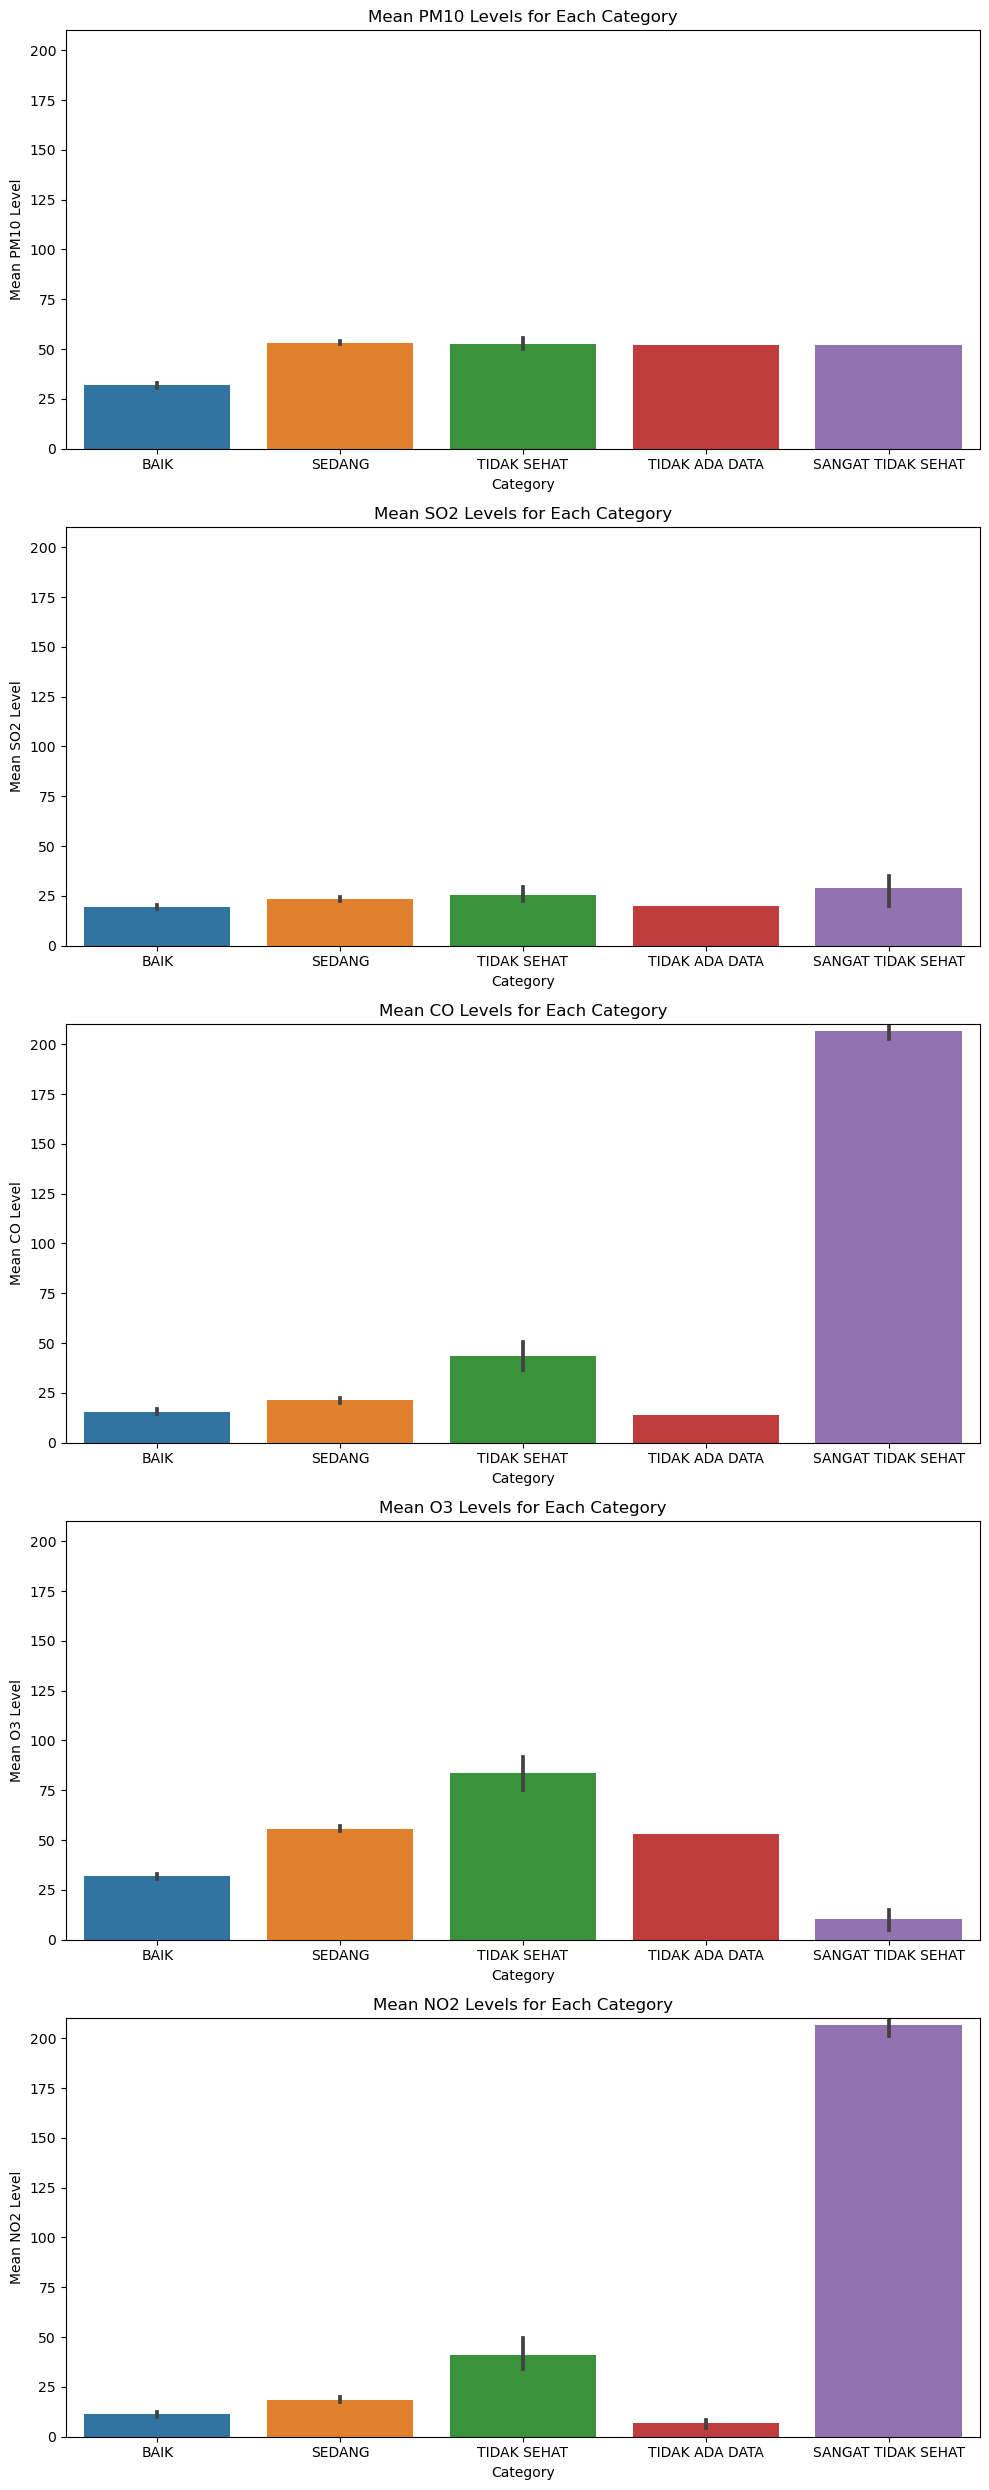

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of pollutants
pollutants = ['pm10', 'so2', 'co', 'o3', 'no2']

# Create subplots
fig, axes = plt.subplots(nrows=len(pollutants), ncols=1, figsize=(10, len(pollutants)*5))

# Plot bar plots for each pollutant
for i, pollutant in enumerate(pollutants):
    sns.barplot(data=df, x='categori', y=pollutant, ax=axes[i])
    axes[i].set_xlabel("Category")
    axes[i].set_ylabel(f"Mean {pollutant.upper()} Level")
    axes[i].set_title(f"Mean {pollutant.upper()} Levels for Each Category")
    axes[i].set_ylim(0, 210)  # Set y-axis limits from 0 to 200

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()
